<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%207/Assignment_7_Trail_2_Buidling_CNN_with_Depthwise_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('sample_data')
!pip install asgnmt7-0.0.1-py3-none-any.whl

Processing ./asgnmt7-0.0.1-py3-none-any.whl
  Found existing installation: asgnmt7 0.0.0
    Uninstalling asgnmt7-0.0.0:
      Successfully uninstalled asgnmt7-0.0.0


## Load the Packages

In [0]:
import torch

from asgnmt7.TrainTestLoader import *
from asgnmt7.ModelDepthwise import Net
from asgnmt7.ModelPerformance import *


## Loading and Viewing Data

Files already downloaded and verified
Files already downloaded and verified
  car   cat  bird   dog


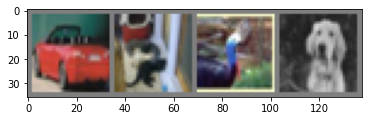

In [3]:
train_loader,test_loader,classes = TrainTestLoad()

ViewTrainingImages(train_loader)

## Loading and Viewing Model

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
net = Net().to(device)
net

Net(
  (convblock1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.1, inplace=False)
  )
  (depthwise): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128)
    (1): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convblock2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropo

In [5]:
from torchsummary import summary
summary(net, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5          [-1, 128, 32, 32]          36,864
              ReLU-6          [-1, 128, 32, 32]               0
       BatchNorm2d-7          [-1, 128, 32, 32]             256
           Dropout-8          [-1, 128, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]           1,280
           Conv2d-10           [-1, 64, 32, 32]           8,256
        MaxPool2d-11           [-1, 64, 16, 16]               0
           Conv2d-12          [-1, 128, 16, 16]          73,728
             ReLU-13          [-1, 128, 16, 16]               0
      BatchNorm2d-14          [-1, 128,

## Buiiding Model

In [6]:
from asgnmt7.Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn

tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

for epoch in range(8):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, epoch,L1 = False)
    scheduler.step()
    acc = tt.test_(net, device, test_loader) 
    
print('Finished Training')

  0%|          | 0/12500 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.7534182071685791 Batch_id=12499 Accuracy=50.48: 100%|██████████| 12500/12500 [02:04<00:00, 100.08it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 1.0085, Accuracy: 6547/10000 (65.47%)

EPOCH: 1


Loss=1.0725603103637695 Batch_id=12499 Accuracy=68.80: 100%|██████████| 12500/12500 [02:03<00:00, 100.94it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.8200, Accuracy: 7207/10000 (72.07%)

EPOCH: 2


Loss=0.1390000581741333 Batch_id=12499 Accuracy=74.65: 100%|██████████| 12500/12500 [02:02<00:00, 102.18it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.7908, Accuracy: 7379/10000 (73.79%)

EPOCH: 3


Loss=0.0570141077041626 Batch_id=12499 Accuracy=78.21: 100%|██████████| 12500/12500 [02:01<00:00, 102.68it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.7470, Accuracy: 7535/10000 (75.35%)

EPOCH: 4


Loss=0.826858401298523 Batch_id=12499 Accuracy=80.55: 100%|██████████| 12500/12500 [02:02<00:00, 102.30it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.6545, Accuracy: 7786/10000 (77.86%)

EPOCH: 5


Loss=1.6768627166748047 Batch_id=12499 Accuracy=82.69: 100%|██████████| 12500/12500 [02:01<00:00, 103.18it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.6043, Accuracy: 8056/10000 (80.56%)

EPOCH: 6


Loss=0.017922282218933105 Batch_id=12499 Accuracy=84.30: 100%|██████████| 12500/12500 [02:00<00:00, 103.62it/s]
  0%|          | 0/12500 [00:00<?, ?it/s]


Test set: Average loss: 0.7046, Accuracy: 7945/10000 (79.45%)

EPOCH: 7


Loss=0.34180372953414917 Batch_id=12499 Accuracy=85.49: 100%|██████████| 12500/12500 [02:00<00:00, 103.61it/s]



Test set: Average loss: 0.7743, Accuracy: 7748/10000 (77.48%)

Finished Training


## Model Graphs

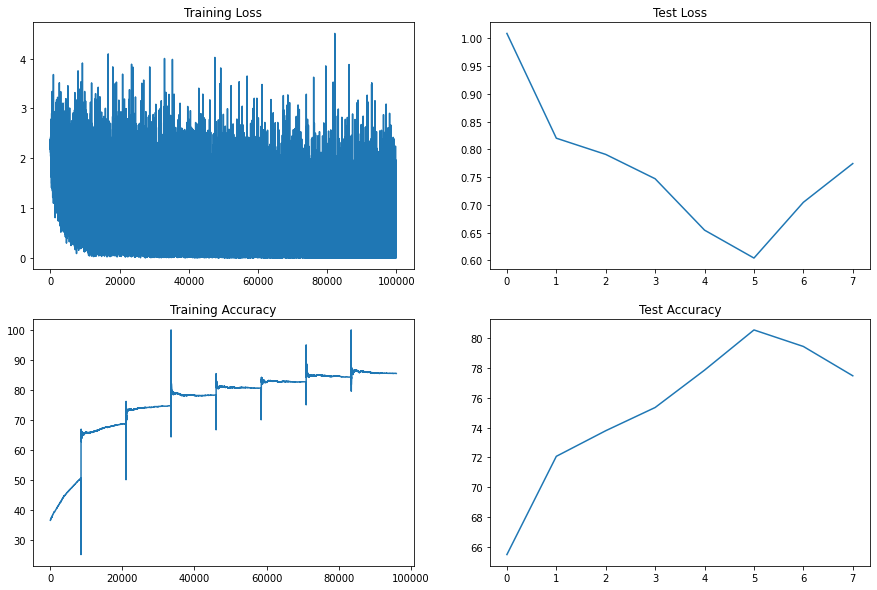

In [7]:
PlotTrainingGraphs(tt)

## View Model Performance

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship   car plane
Accuracy of the network on the 10000 test images: 77 %
Accuracy of plane : 73 %
Accuracy of   car : 92 %
Accuracy of  bird : 54 %
Accuracy of   cat : 64 %
Accuracy of  deer : 80 %
Accuracy of   dog : 72 %
Accuracy of  frog : 83 %
Accuracy of horse : 85 %
Accuracy of  ship : 80 %
Accuracy of truck : 85 %


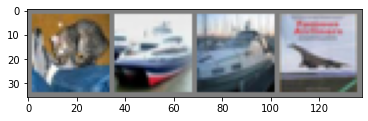

In [8]:
ViewModelPerformance(test_loader,net,classes,device)